## Statistics Practical Implementation

### Measure of Central Tendency

    1.Mean                                                                                                                 2.Median  
    3.Mode  

In [1]:
ages = [23,24,32,45,12,43,67,45,32,56,32]

In [3]:
import numpy as np

print(np.mean(ages))
print(np.median(ages))

37.36363636363637
32.0


In [3]:
ages = [23,24,32,45,12,43,67,45,32,56,32,120]

In [4]:
import numpy as np

print(np.mean(ages))
print(np.median(ages))

44.25
37.5


In [5]:
import statistics

print(statistics.mean(ages))
print(statistics.median(ages))

44.25
37.5


In [6]:
print(statistics.mode(ages))

32


C:\Users\Atanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

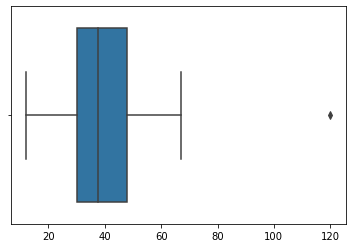

In [7]:
import seaborn as sns

sns.boxplot(ages)

## 5 Number Summary

In [17]:
import numpy as np

q1,q3 = np.percentile(ages,[25,75])

In [18]:
q1,q3

(30.0, 47.75)

In [19]:
## to check outlier[Lower Fence - Higher Fence]
IQR = q3 - q1
lower_fence = q1 - 1.5 * IQR
higher_fence = q3 + 1.5 * IQR
print(lower_fence,higher_fence)

3.375 74.375


## Measure of Dispersion

  #### 1.Variance  
  #### 2. Standard Deviation

In [28]:
# It will calculate Sample Variance
statistics.variance(ages)

795.2954545454545

In [29]:
# It will calculate Population Variance
np.var(ages)

729.0208333333334

In [30]:
# Function of Sample Variance
def sample_var(ages):
    n = len(ages)
    mean = sum(ages)/n
    deviation = [(x-mean)**2 for x in ages]
    variance = sum(deviation)/(n-1)
    return variance

In [31]:
sample_var(ages)

795.2954545454545

In [32]:
# Function of Population Variance
def popul_var(ages):
    n = len(ages)
    mean = sum(ages)/n
    deviation = [(x-mean)**2 for x in ages]
    variance = sum(deviation)/(n)
    return variance

In [33]:
popul_var(ages)

729.0208333333334

In [34]:
def var(ages,dof=0):
    n = len(ages)
    mean = sum(ages)/n
    deviation = [(x-mean)**2 for x in ages]
    variance = sum(deviation)/(n-dof)
    return variance

In [35]:
# Sample Variance
var(ages,1)

795.2954545454545

In [36]:
# Population variance
var(ages,0)

729.0208333333334

In [38]:
# Population variance
statistics.pvariance(ages)

729.0208333333334

In [40]:
# Poopulation Standard Deviation
import math

math.sqrt(statistics.pvariance(ages))

27.000385799712813

## Histogram And PDF

<AxesSubplot:ylabel='Count'>

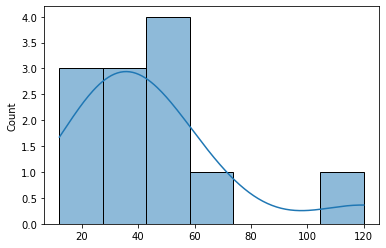

In [41]:
import seaborn as sns

sns.histplot(ages,kde=True)

In [8]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

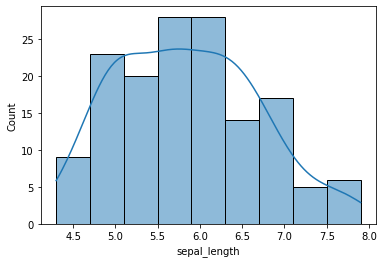

In [45]:
sns.histplot(df['sepal_length'],kde=True)

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

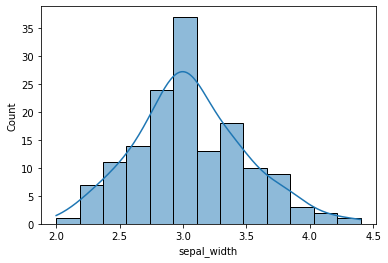

In [46]:
sns.histplot(df['sepal_width'],kde=True)

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

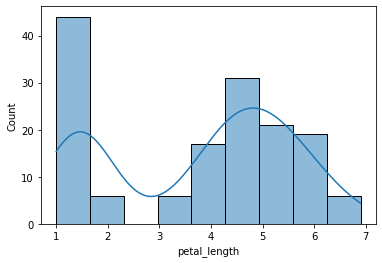

In [47]:
sns.histplot(df['petal_length'],kde=True)

<AxesSubplot:xlabel='petal_width', ylabel='Count'>

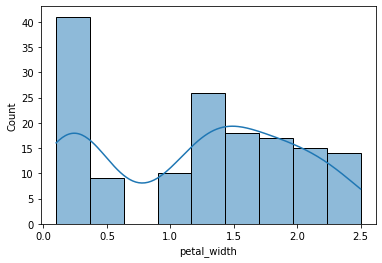

In [48]:
sns.histplot(df['petal_width'],kde=True)

In [56]:
## create normal distributed data
s = np.random.normal(0.5,0.2,1000)

<AxesSubplot:ylabel='Count'>

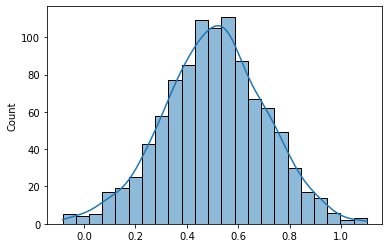

In [57]:
sns.histplot(s,kde=True)

## Log normal Distribution, Power Law Distribution

In [62]:
mu, sigma = 3., 1. #mean and standard deviation
s = np.random.lognormal(mu,sigma,1000)

<AxesSubplot:ylabel='Count'>

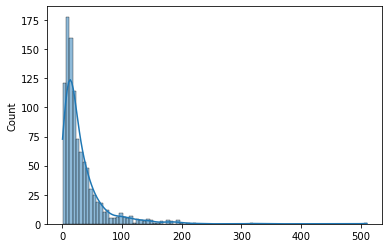

In [63]:
sns.histplot(s,kde=True)

<AxesSubplot:ylabel='Count'>

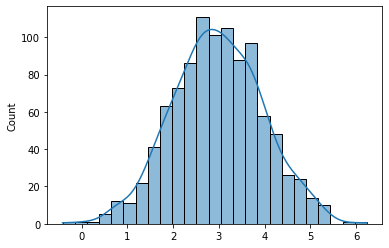

In [64]:
sns.histplot(np.log(s),kde=True)

## Check Whether Distribution is Normal Distribution

In [10]:
#### If you want to check whether feature is gaussian or normal distributed
#### Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()

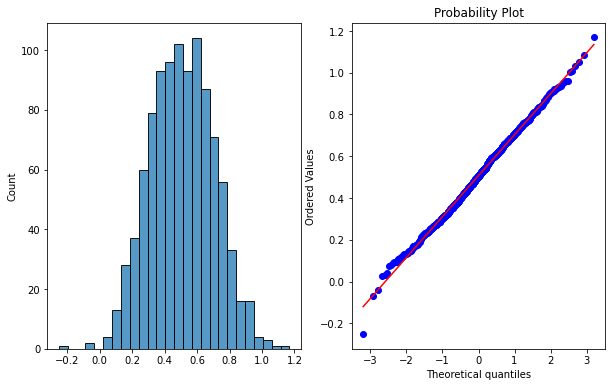

In [67]:
## create a normal distributed data
s = np.random.normal(0.5,0.2,1000)
plot_data(s)

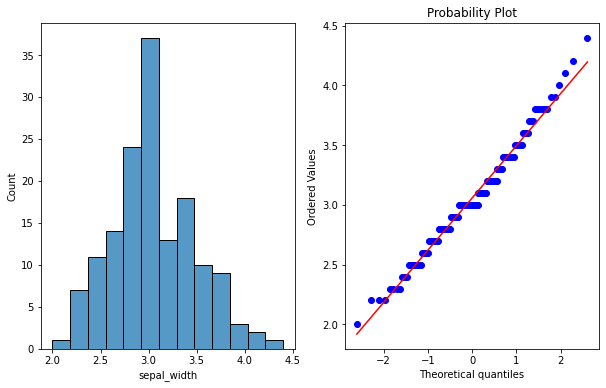

In [68]:
## create a normal distributed data
plot_data(df['sepal_width'])

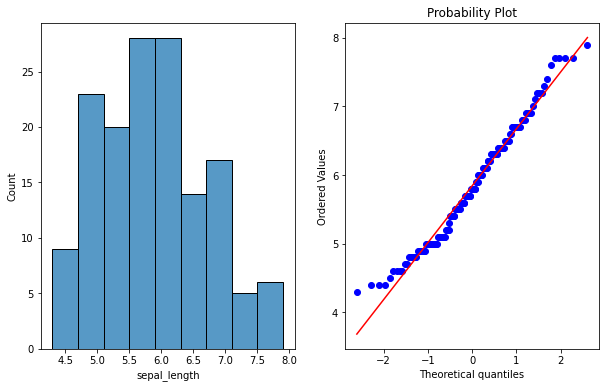

In [11]:
## It will not create a normal distributed data
plot_data(df['sepal_length'])

## Check Whether Distribution is Log Normal Distribution

In [69]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [70]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

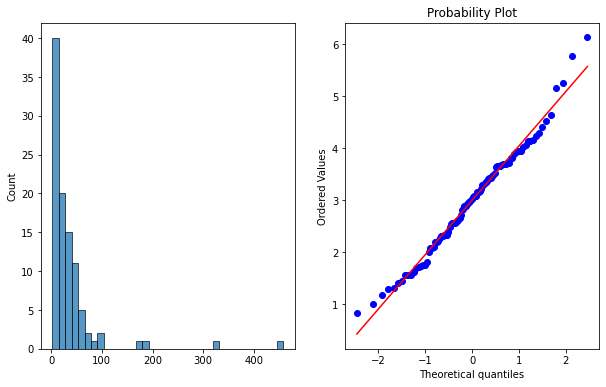

In [71]:
plot_data_log(sample)

## Pearson and Sperman Rank Correlation

In [72]:
df=sns.load_dataset('tips')

In [73]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [74]:
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


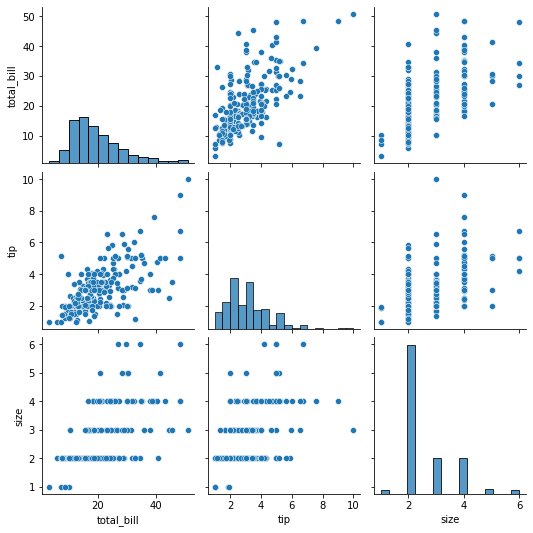

In [75]:
sns.pairplot(df)